<a href="https://colab.research.google.com/github/ernanibn/redes_neurais_artificiais/blob/main/atividade_2_mnist_Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Atividade 2
### Tratativa para ler os arquivos do Mnist
##### *fonte: https://www.kaggle.com/code/hojjatk/read-mnist-dataset - adaptado*

##### database: http://yann.lecun.com/exdb/mnist/




In [107]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join
from os import getcwd
#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            # if magic != 2049:
            #     raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            # if magic != 2051:
            #     raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img

        return images, labels

    def load_data(self):
        train_images, train_label = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        test_images, test_labels = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (train_images, train_label),(test_images, test_labels)


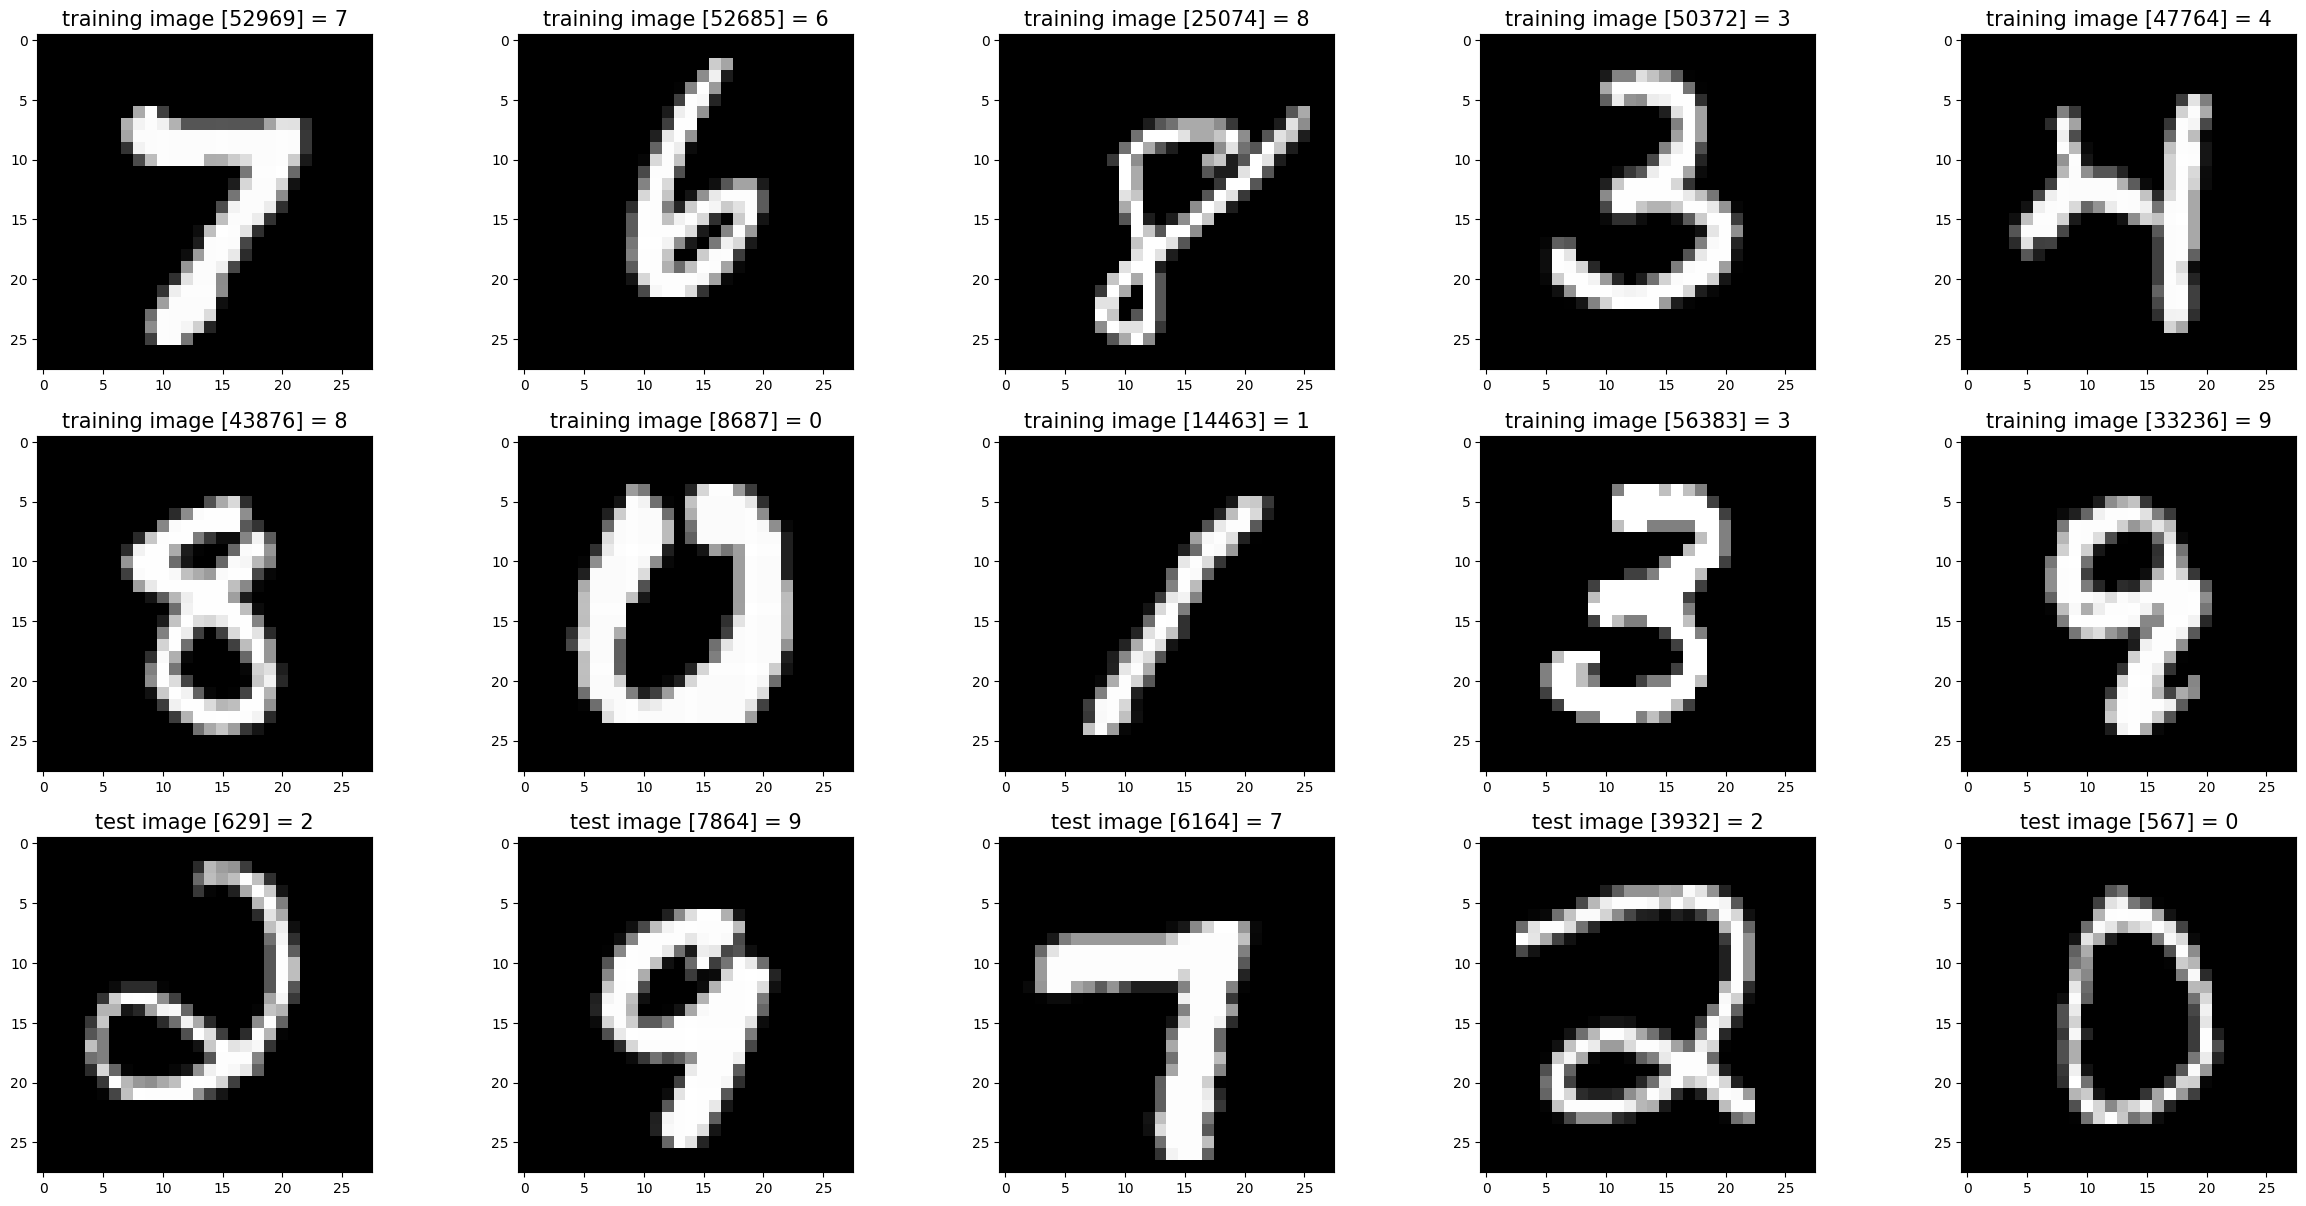

In [108]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = getcwd() + '/database'
training_images_filepath = join(input_path, 'train-images.idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels.idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images.idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels.idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image
                   , cmap=plt.cm.gray
                   )
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath
                                   , training_labels_filepath
                                   , test_images_filepath, test_labels_filepath)

(train_images, train_labels), (test_images, test_labels) = mnist_dataloader.load_data()

#
# Show some random training and test images
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(train_images[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(train_labels[r]))

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(test_images[r])
    titles_2_show.append('test image [' + str(r) + '] = ' + str(test_labels[r]))

show_images(images_2_show, titles_2_show)

In [109]:
from tensorflow.keras import Sequential,layers
from tensorflow.keras.utils import to_categorical

# Dimensão das imagens
height, width, channels = 28,28,1
num_classes = 10

In [110]:
# Converte para numpy.array
train_images_np = np.array(train_images)
train_labels_np = np.array(train_labels)
test_images_np = np.array(test_images)
test_labels_np = np.array(test_labels)

# Redimensiona para 28x28 com um canal
train_images_np_resized = train_images_np.reshape(-1, height, width, channels)

# Redimensiona para 32x32
# train_images_np_resized = np.pad(train_images_np_resized, ((0,0),(2,2),(2,2),(0,0)), mode='constant')

train_images_np_resized = train_images_np_resized.astype("float32") / 255


# Redimensiona para 28x28 com um canal
test_images_np_resized = test_images_np.reshape(-1, height, width, channels)

# Redimensiona para 32x32
# test_images_np_resized = np.pad(test_images_np_resized, ((0,0),(2,2),(2,2),(0,0)), mode='constant')

test_images_np_resized = test_images_np_resized.astype("float32") / 255

# One-Hot Encoding
# train_labels_np = to_categorical(train_labels,num_classes)
# test_labels_np = to_categorical(test_labels_np, num_classes)

input_shape_db = (train_images_np_resized.shape[1]
                  ,train_images_np_resized.shape[2]
                  ,train_images_np_resized.shape[3])

In [111]:
model = Sequential([
    # layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape_db),
    # layers.MaxPooling2D(pool_size=(2, 2)),
    # layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    # layers.MaxPooling2D(pool_size=(2, 2)),
    # layers.Flatten(),
    # layers.Dense(120, activation='relu'),
    # layers.Dense(84, activation='relu'),
    # layers.Dense(num_classes, activation='softmax')
      layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape_db),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense(num_classes, activation='softmax')



])

In [112]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [120]:
model.fit(train_images_np_resized, train_labels_np, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 45s 97ms/step - loss: 0.0177 - accuracy: 0.9945
Epoch 2/5
469/469 [==============================] - 44s 94ms/step - loss: 0.0143 - accuracy: 0.9955
Epoch 3/5
469/469 [==============================] - 43s 92ms/step - loss: 0.0120 - accuracy: 0.9956
Epoch 4/5
469/469 [==============================] - 44s 94ms/step - loss: 0.0095 - accuracy: 0.9970
Epoch 5/5
469/469 [==============================] - 43s 91ms/step - loss: 0.0086 - accuracy: 0.9972


In [114]:
predicted = model.predict(test_images_np_resized[0:1])
predicted[0]

1/1 [==============================] - 0s 87ms/step


array([1.3723095e-09, 3.5222627e-08, 1.6464865e-08, 1.8143162e-06,
       9.7035624e-08, 2.7699005e-09, 1.3638802e-14, 9.9999809e-01,
       8.1647300e-10, 2.2603272e-08], dtype=float32)

In [115]:
sum(predicted[0])

1.000000083252644

In [116]:
maior = predicted[0].argmax()

In [117]:
predicted[0][maior]

0.9999981

In [118]:
test_labels[0]

7

In [119]:
test_loss, test_acc = model.evaluate(test_images_np_resized, test_labels_np)
print(f"test_acc: {test_acc}")

# 0.9873999953269958
# 0.9889000058174133

313/313 [==============================] - 3s 10ms/step - loss: 0.0312 - accuracy: 0.9903
test_acc: 0.9902999997138977
